In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

# Import data
* This is the combined results, candidate features, and county features
* Created from data_processing notebook

In [50]:
combined_results = 'combined_results_supertues.csv'
data = pd.read_csv(combined_results)

data

,last name,votes,state,winner,percent_votes,winner_state,fips,county,PST045214,PST040210,...,carbon_tax,north_korea_meet,free_college,children_public,ban_fracking,border_crossing_penalties,medicare_for_all,private_insurance,eliminate_electoral_college,eliminate_filibuster
0,Biden,266,AL,1,0.694517,1,1133,Winston County,24150,24483,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Biden,1864,AL,1,0.867784,1,1131,Wilcox County,11098,11665,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Biden,1109,AL,1,0.876680,1,1129,Washington County,16834,17583,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Biden,1390,AL,1,0.720954,1,1127,Walker County,65471,67023,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Biden,11825,AL,1,0.769006,1,1125,Tuscaloosa County,202212,194653,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3231,Sanders,4075,WA,0,0.462963,0,53007,Chelan County,74588,72456,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
3232,Sanders,6911,WA,0,0.448330,0,53005,Benton County,186486,175177,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
3233,Sanders,705,WA,0,0.386725,0,53003,Asotin County,22189,21623,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
3234,Sanders,288,WA,1,0.503497,0,53001,Adams County,19179,18728,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


# Select Columns for Training
* votes, state, winner, and percent_votes will be dropped later

In [51]:
training_data = data.drop(['Gender','last name', 'fips', 'county', 'winner_state'], axis=1)
training_data.head()

,votes,state,winner,percent_votes,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,...,carbon_tax,north_korea_meet,free_college,children_public,ban_fracking,border_crossing_penalties,medicare_for_all,private_insurance,eliminate_electoral_college,eliminate_filibuster
0,266,AL,1,0.694517,24150,24483,-1.4,24484,5.0,20.9,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1864,AL,1,0.867784,11098,11665,-4.9,11670,5.7,24.8,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1109,AL,1,0.876680,16834,17583,-4.3,17581,4.9,22.5,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1390,AL,1,0.720954,65471,67023,-2.3,67023,5.8,22.1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,11825,AL,1,0.769006,202212,194653,3.9,194656,6.0,21.1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Exploratory Analysis

In [52]:
training_data.columns

Index(['votes', 'state', 'winner', 'percent_votes', 'PST045214', 'PST040210',
       'PST120214', 'POP010210', 'AGE135214', 'AGE295214', 'AGE775214',
       'SEX255214', 'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214',
       'RHI525214', 'RHI625214', 'RHI725214', 'RHI825214', 'POP715213',
       'POP645213', 'POP815213', 'EDU635213', 'EDU685213', 'VET605213',
       'LFE305213', 'HSG010214', 'HSG445213', 'HSG096213', 'HSG495213',
       'HSD410213', 'HSD310213', 'INC910213', 'INC110213', 'PVY020213',
       'BZA010213', 'BZA110213', 'BZA115213', 'NES010213', 'SBO001207',
       'SBO315207', 'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207',
       'SBO015207', 'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207',
       'AFN120207', 'BPS030214', 'LND110210', 'POP060210', 'Age', 'Net Worth',
       '% Donations Under $200', 'Candidate Committee Money', 'Outside Money',
       'Twitter Followers', 'legalize_cannabis', 'vote_incarcerated',
       'gun_licenses', 'tax_wealthy_assets', '

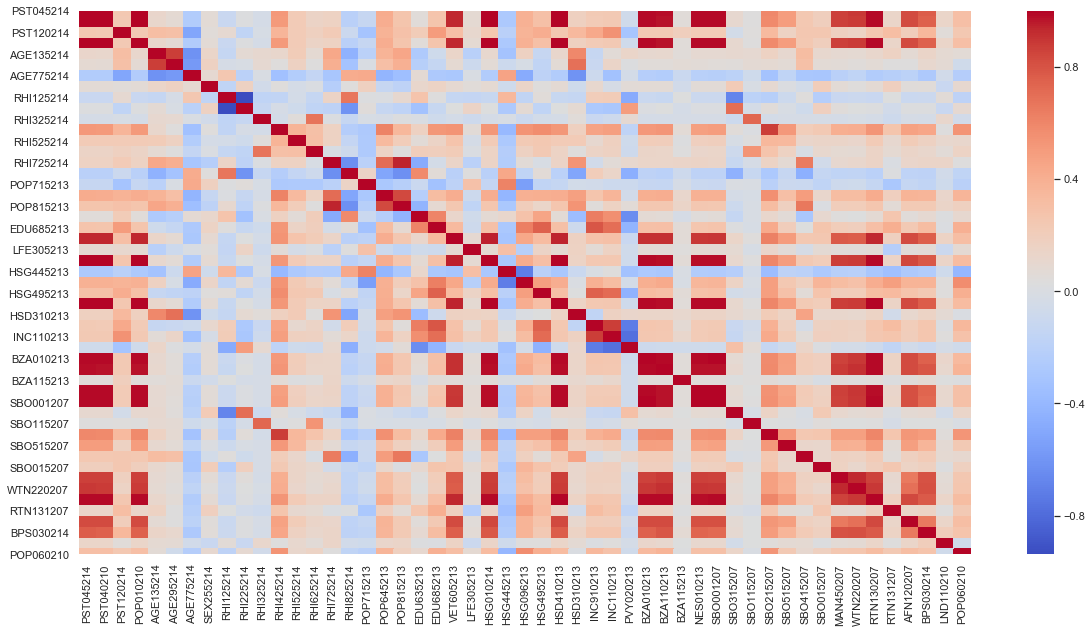

In [53]:
plt.figure(figsize=(20,10))

sns.heatmap(training_data[['PST045214', 'PST040210', 'PST120214',
       'POP010210', 'AGE135214', 'AGE295214', 'AGE775214', 'SEX255214',
       'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214', 'RHI525214',
       'RHI625214', 'RHI725214', 'RHI825214', 'POP715213', 'POP645213',
       'POP815213', 'EDU635213', 'EDU685213', 'VET605213', 'LFE305213',
       'HSG010214', 'HSG445213', 'HSG096213', 'HSG495213', 'HSD410213',
       'HSD310213', 'INC910213', 'INC110213', 'PVY020213', 'BZA010213',
       'BZA110213', 'BZA115213', 'NES010213', 'SBO001207', 'SBO315207',
       'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207', 'SBO015207',
       'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207', 'AFN120207',
       'BPS030214', 'LND110210', 'POP060210']].corr(), cmap='coolwarm')

In [54]:
df_corr = training_data[['PST045214', 'PST040210', 'PST120214',
       'POP010210', 'AGE135214', 'AGE295214', 'AGE775214', 'SEX255214',
       'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214', 'RHI525214',
       'RHI625214', 'RHI725214', 'RHI825214', 'POP715213', 'POP645213',
       'POP815213', 'EDU635213', 'EDU685213', 'VET605213', 'LFE305213',
       'HSG010214', 'HSG445213', 'HSG096213', 'HSG495213', 'HSD410213',
       'HSD310213', 'INC910213', 'INC110213', 'PVY020213', 'BZA010213',
       'BZA110213', 'BZA115213', 'NES010213', 'SBO001207', 'SBO315207',
       'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207', 'SBO015207',
       'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207', 'AFN120207',
       'BPS030214', 'LND110210', 'POP060210']].corr()



## Sanders percent vote demographic features heat map

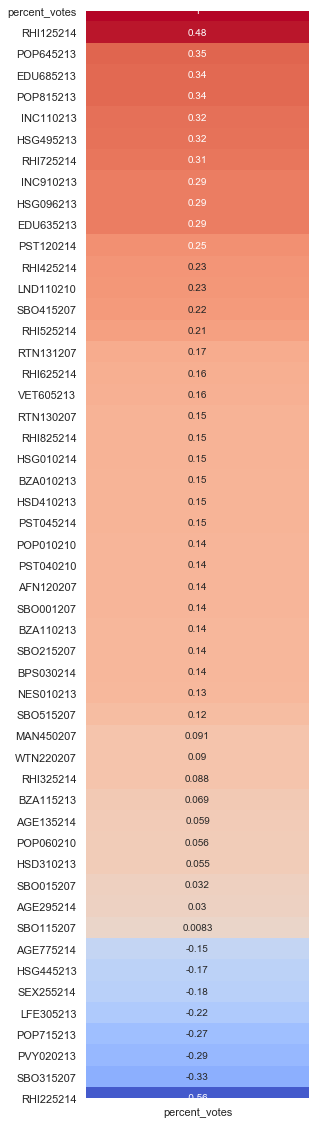

In [55]:
def heatmap_numeric_w_dependent_variable(df, dependent_variable):
    '''
    Takes df, a dependant variable as str
    Returns a heatmap of all independent variables' correlations with dependent variable 
    '''
    plt.figure(figsize=(4, 20))
    g = sns.heatmap(df.corr()[[dependent_variable]].sort_values(ascending=False, by=dependent_variable), 
                    annot=True, 
                    cmap='coolwarm', 
                    vmin=-0.6,
                    vmax=0.5,
                    cbar=False) 
    return g

sanders_df = data[data['last name'] == 'Sanders']


heatmap_numeric_w_dependent_variable(sanders_df[['percent_votes', 'PST045214', 'PST040210', 'PST120214',
       'POP010210', 'AGE135214', 'AGE295214', 'AGE775214', 'SEX255214',
       'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214', 'RHI525214',
       'RHI625214', 'RHI725214', 'RHI825214', 'POP715213', 'POP645213',
       'POP815213', 'EDU635213', 'EDU685213', 'VET605213', 'LFE305213',
       'HSG010214', 'HSG445213', 'HSG096213', 'HSG495213', 'HSD410213',
       'HSD310213', 'INC910213', 'INC110213', 'PVY020213', 'BZA010213',
       'BZA110213', 'BZA115213', 'NES010213', 'SBO001207', 'SBO315207',
       'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207', 'SBO015207',
       'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207', 'AFN120207',
       'BPS030214', 'LND110210', 'POP060210']], 'percent_votes')

## Biden percent vote demographic features heat map

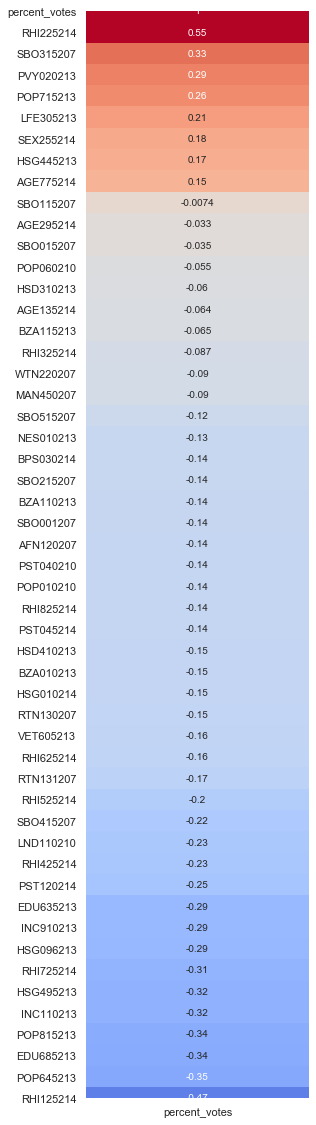

In [56]:
biden_df = data[data['last name'] == 'Biden']

heatmap_numeric_w_dependent_variable(biden_df[['percent_votes', 'PST045214', 'PST040210', 'PST120214',
       'POP010210', 'AGE135214', 'AGE295214', 'AGE775214', 'SEX255214',
       'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214', 'RHI525214',
       'RHI625214', 'RHI725214', 'RHI825214', 'POP715213', 'POP645213',
       'POP815213', 'EDU635213', 'EDU685213', 'VET605213', 'LFE305213',
       'HSG010214', 'HSG445213', 'HSG096213', 'HSG495213', 'HSD410213',
       'HSD310213', 'INC910213', 'INC110213', 'PVY020213', 'BZA010213',
       'BZA110213', 'BZA115213', 'NES010213', 'SBO001207', 'SBO315207',
       'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207', 'SBO015207',
       'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207', 'AFN120207',
       'BPS030214', 'LND110210', 'POP060210']], 'percent_votes')

# Random Forest Classification

## Predictions Using Results up to Super Tuesday
* First we'll use all the features

### Select states used for training

In [57]:
training_states = ['IA', 'NH', 'NV', 'SC', 'AL', 'AR', 'CA', 'CO', 'ME', 'MA', 'MN', 'NC', 'OK', 'TN', 'TX', 'UT', 'VT', 'VA']

training_data_BT = training_data[training_data['state'].isin(training_states)]

training_data_BT.drop(['state', 'votes', 'percent_votes'], axis=1, inplace=True)

training_data_BT

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,winner,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,...,carbon_tax,north_korea_meet,free_college,children_public,ban_fracking,border_crossing_penalties,medicare_for_all,private_insurance,eliminate_electoral_college,eliminate_filibuster
0,1,24150,24483,-1.4,24484,5.0,20.9,20.0,50.9,96.3,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,11098,11665,-4.9,11670,5.7,24.8,17.7,52.4,28.1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,16834,17583,-4.3,17581,4.9,22.5,17.0,51.2,66.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,65471,67023,-2.3,67023,5.8,22.1,18.2,51.4,91.3,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,202212,194653,3.9,194656,6.0,21.1,11.7,51.7,66.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,0,12855,12695,1.3,12690,5.3,21.1,18.2,51.3,74.8,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
3192,0,15820,16261,-2.7,16250,4.3,19.1,24.3,50.8,92.9,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
3193,0,150575,140006,7.5,139966,7.5,17.8,10.1,51.6,66.4,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
3194,0,104489,98998,5.5,98970,5.5,21.0,16.5,52.2,82.3,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


### Train and score

In [58]:
X = training_data_BT.drop('winner',axis=1)
y = training_data_BT['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
predictions = rfc.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[257  53]
 [ 38 279]]


              precision    recall  f1-score   support

           0       0.87      0.83      0.85       310
           1       0.84      0.88      0.86       317

    accuracy                           0.85       627
   macro avg       0.86      0.85      0.85       627
weighted avg       0.86      0.85      0.85       627



In [60]:
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), X.columns), 
             reverse=True))

Features sorted by their score:
[(0.0479, 'LND110210'), (0.0473, 'RHI225214'), (0.0308, 'HSG495213'), (0.0279, 'EDU635213'), (0.0228, 'RHI125214'), (0.0213, 'EDU685213'), (0.0206, 'HSG096213'), (0.0183, 'POP815213'), (0.0181, 'RHI725214'), (0.0178, 'POP645213'), (0.0172, 'RHI825214'), (0.0164, 'HSG445213'), (0.0162, 'eliminate_filibuster'), (0.0154, 'RHI325214'), (0.0153, 'SEX255214'), (0.0153, 'AGE295214'), (0.0146, 'INC110213'), (0.0141, 'POP060210'), (0.014, 'raise_income_tax'), (0.014, 'ban_fracking'), (0.0136, 'RHI425214'), (0.0136, 'LFE305213'), (0.0134, 'north_korea_meet'), (0.0133, 'INC910213'), (0.0131, 'HSD310213'), (0.013, 'job_guarantee'), (0.0128, 'tax_wealthy_assets'), (0.0124, 'PVY020213'), (0.0124, 'POP715213'), (0.0123, 'free_college'), (0.0123, 'Outside Money'), (0.0122, 'gun_licenses'), (0.0122, 'AFN120207'), (0.012, 'RTN131207'), (0.0119, 'medicare_for_all'), (0.0118, 'Net Worth'), (0.0117, 'children_public'), (0.0116, 'carbon_tax'), (0.0115, 'vote_incarcerated'), (

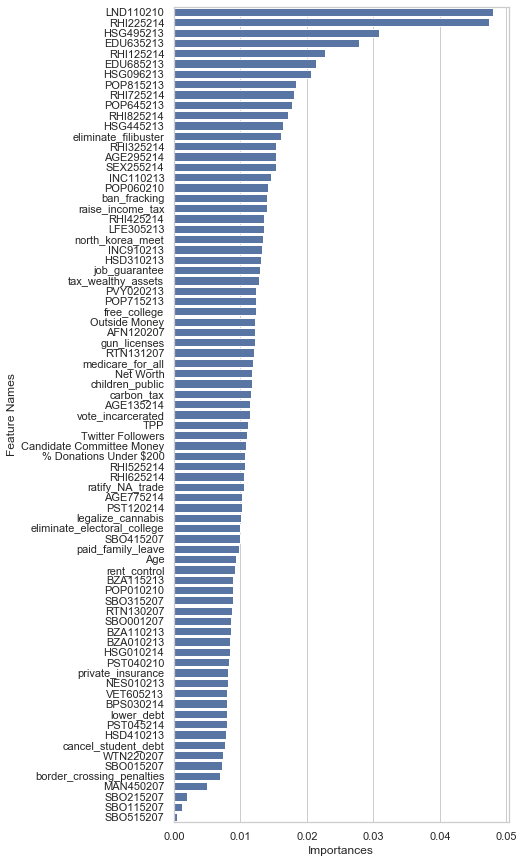

In [61]:
feature_importances = pd.DataFrame({"Feature Names": X.columns, "Importances": rfc.feature_importances_}).sort_values(by="Importances", ascending=False)

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="Importances", y="Feature Names", data=feature_importances,
            label="Total", color="b")

### Isolate big tuesday states for prediction
* isolating from the results data because we want the results for these states for comparison to our predictions

In [62]:
big_tuesday = data[~data['state'].isin(training_states)]

big_tuesday

,last name,votes,state,winner,percent_votes,winner_state,fips,county,PST045214,PST040210,...,carbon_tax,north_korea_meet,free_college,children_public,ban_fracking,border_crossing_penalties,medicare_for_all,private_insurance,eliminate_electoral_college,eliminate_filibuster
264,Biden,241,ID,1,0.748447,1,16087,Washington County,10021,10198,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
265,Biden,653,ID,1,0.620722,1,16085,Valley County,9826,9862,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
266,Biden,1505,ID,1,0.558856,1,16083,Twin Falls County,80914,77230,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
267,Biden,613,ID,0,0.471538,1,16081,Teton County,10341,10170,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
268,Biden,577,ID,1,0.640400,1,16079,Shoshone County,12390,12765,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3231,Sanders,4075,WA,0,0.462963,0,53007,Chelan County,74588,72456,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
3232,Sanders,6911,WA,0,0.448330,0,53005,Benton County,186486,175177,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
3233,Sanders,705,WA,0,0.386725,0,53003,Asotin County,22189,21623,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
3234,Sanders,288,WA,1,0.503497,0,53001,Adams County,19179,18728,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


### Isolate future states for prediction
* have to pull these from predictions.csv (created from the county facts file) since our results data does not include these states

In [67]:
future_states = pd.read_csv('predictions.csv')

# filter out training states
future_states = future_states[~future_states['state_abbreviation'].isin(training_states)]

# filter out states already in the big_tuesday dataframe above
future_states = future_states[~future_states['state_abbreviation'].isin(big_tuesday['state'])]

# drop and rename columns
future_states.drop(['state'], axis=1, inplace=True)
future_states.rename(columns={'state_abbreviation': 'state', 'candidate': 'last name'}, inplace=True)

# add columns to match the big_tuesday dataframe
future_states['votes'], future_states['winner'], future_states['percent_votes'], future_states['winner_state'] = [0, -1, 0, -1]

future_states

,state,county,fips,last name,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,...,ban_fracking,border_crossing_penalties,medicare_for_all,private_insurance,eliminate_electoral_college,eliminate_filibuster,votes,winner,percent_votes,winner_state
134,AZ,Apache,4001,Sanders,71828,71518,0.4,71518,7.6,29.3,...,1,0,1,1,1,1,0,-1,0,-1
135,AZ,Apache,4001,Biden,71828,71518,0.4,71518,7.6,29.3,...,0,1,0,0,0,0,0,-1,0,-1
136,AZ,Cochise,4003,Sanders,127448,131357,-3.0,131346,6.5,22.4,...,1,0,1,1,1,1,0,-1,0,-1
137,AZ,Cochise,4003,Biden,127448,131357,-3.0,131346,6.5,22.4,...,0,1,0,0,0,0,0,-1,0,-1
138,AZ,Coconino,4005,Sanders,137682,134437,2.4,134421,6.1,21.8,...,1,0,1,1,1,1,0,-1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5445,WY,Uinta,56041,Biden,20904,21118,-1.0,21118,7.6,29.8,...,0,1,0,0,0,0,0,-1,0,-1
5446,WY,Washakie,56043,Sanders,8322,8533,-2.5,8533,5.5,23.9,...,1,0,1,1,1,1,0,-1,0,-1
5447,WY,Washakie,56043,Biden,8322,8533,-2.5,8533,5.5,23.9,...,0,1,0,0,0,0,0,-1,0,-1
5448,WY,Weston,56045,Sanders,7201,7208,-0.1,7208,6.5,21.6,...,1,0,1,1,1,1,0,-1,0,-1


### Merge to create final dataframe for predictions

In [68]:
predictions = big_tuesday.append(future_states, sort=False)

predictions_for_model = predictions.drop(['state', 'votes', 'percent_votes', 'winner', 'last name', 'winner_state', 'fips', 'county', 'Gender'], axis=1)

predictions_for_model

,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,...,carbon_tax,north_korea_meet,free_college,children_public,ban_fracking,border_crossing_penalties,medicare_for_all,private_insurance,eliminate_electoral_college,eliminate_filibuster
264,10021,10198,-1.7,10198,5.0,23.4,22.7,50.1,94.9,0.4,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
265,9826,9862,-0.4,9862,4.3,18.3,21.6,48.1,96.5,0.2,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
266,80914,77230,4.8,77230,7.7,27.6,14.8,50.7,94.5,0.7,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
267,10341,10170,1.7,10170,7.8,27.8,8.6,48.2,97.0,0.4,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
268,12390,12765,-2.9,12765,5.2,19.7,21.7,49.5,94.9,0.3,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5445,20904,21118,-1.0,21118,7.6,29.8,11.0,49.6,95.4,0.9,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5446,8322,8533,-2.5,8533,5.5,23.9,20.1,49.3,94.8,0.8,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
5447,8322,8533,-2.5,8533,5.5,23.9,20.1,49.3,94.8,0.8,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5448,7201,7208,-0.1,7208,6.5,21.6,18.1,47.4,95.0,0.7,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


### State predictions for big tuesday and beyond

In [69]:
predictions_BT = rfc.predict(predictions_for_model)

predictions['predicted_winner'] = predictions_BT

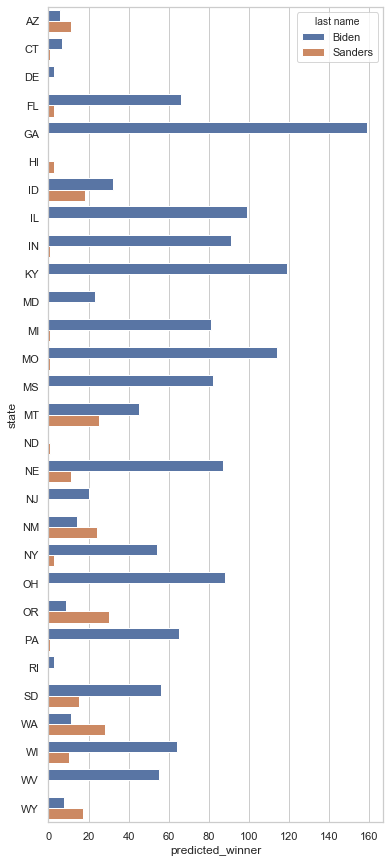

In [70]:
winner_plot = predictions.groupby(['last name', 'state'])['predicted_winner'].sum().reset_index()

f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="predicted_winner", y = 'state', data = winner_plot, hue = 'last name')

### Add state winner column to prediction

In [71]:
def add_state_winner(big_tuesday):
    
    big_tuesday_state = pd.DataFrame()
    
    for index,row in big_tuesday[['state']].drop_duplicates().iterrows():
    
        # filter for unique state
        filtered_df = big_tuesday[big_tuesday['state'] == row['state']]

        winner = []

        biden_sum = filtered_df[filtered_df['last name'] == 'Biden']['predicted_winner'].sum()
        sanders_sum = filtered_df[filtered_df['last name'] == 'Sanders']['predicted_winner'].sum()

        for index,row in filtered_df.iterrows():
            if row['last name'] == 'Biden':
                if biden_sum > sanders_sum:
                    winner.append(1)
                else:
                    winner.append(0)    
            else:
                if biden_sum > sanders_sum:
                    winner.append(0)
                else:
                    winner.append(1)

        filtered_df['predicted_winner_state'] = winner

        big_tuesday_state = big_tuesday_state.append(filtered_df)
    
    # Add column tagging these counties as being used in the model
    big_tuesday_state['used_in_model'] = 0
    
    return big_tuesday_state

big_tuesday_state = add_state_winner(predictions)

big_tuesday_state

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,last name,votes,state,winner,percent_votes,winner_state,fips,county,PST045214,PST040210,...,children_public,ban_fracking,border_crossing_penalties,medicare_for_all,private_insurance,eliminate_electoral_college,eliminate_filibuster,predicted_winner,predicted_winner_state,used_in_model
264,Biden,241,ID,1,0.748447,1,16087,Washington County,10021,10198,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0
265,Biden,653,ID,1,0.620722,1,16085,Valley County,9826,9862,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0
266,Biden,1505,ID,1,0.558856,1,16083,Twin Falls County,80914,77230,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0
267,Biden,613,ID,0,0.471538,1,16081,Teton County,10341,10170,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0
268,Biden,577,ID,1,0.640400,1,16079,Shoshone County,12390,12765,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5445,Biden,0,WY,-1,0.000000,-1,56041,Uinta,20904,21118,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0
5446,Sanders,0,WY,-1,0.000000,-1,56043,Washakie,8322,8533,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1,1,0
5447,Biden,0,WY,-1,0.000000,-1,56043,Washakie,8322,8533,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0
5448,Sanders,0,WY,-1,0.000000,-1,56045,Weston,7201,7208,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0,1,0


### Append prediction states to training states
* This creates a dataframe that includes all the states we used for prediction, plus all the states that were used in training

In [73]:
training_states_df = data[data['state'].isin(training_states)]
training_states_df['used_in_model'] = 1
training_states_df['predicted_winner'] = -1
training_states_df['predicted_winner_state'] = -1

merged = big_tuesday_state.append(training_states_df, sort=False)

merged

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,last name,votes,state,winner,percent_votes,winner_state,fips,county,PST045214,PST040210,...,children_public,ban_fracking,border_crossing_penalties,medicare_for_all,private_insurance,eliminate_electoral_college,eliminate_filibuster,predicted_winner,predicted_winner_state,used_in_model
264,Biden,241,ID,1,0.748447,1,16087,Washington County,10021,10198,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0
265,Biden,653,ID,1,0.620722,1,16085,Valley County,9826,9862,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0
266,Biden,1505,ID,1,0.558856,1,16083,Twin Falls County,80914,77230,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0
267,Biden,613,ID,0,0.471538,1,16081,Teton County,10341,10170,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0
268,Biden,577,ID,1,0.640400,1,16079,Shoshone County,12390,12765,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,Sanders,171,VA,0,0.182692,0,51007,Amelia County,12855,12695,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,-1,-1,1
3192,Sanders,234,VA,0,0.285366,0,51005,Alleghany County,15820,16261,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,-1,-1,1
3193,Sanders,7586,VA,0,0.267414,0,51510,Alexandria city,150575,140006,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,-1,-1,1
3194,Sanders,6315,VA,0,0.338533,0,51003,Albemarle County,104489,98998,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,-1,-1,1


### Save prediction

In [74]:
merged.to_csv('predictions/rfc_bigtuesday_allfeat.csv', index=False)

## Removing features
* Repeat big tuesday predictions after removing features with low importance and high correlation
* SBO515207: Native Hawaiian- and Other Pacific Islander-owned firms, percent, 2007
* SBO115207: American Indian- and Alaska Native-owned firms, percent, 2007
* SBO215207: Asian-owned firms, percent, 2007
* MAN450207: Manufacturers shipments, 2007 ($1,000)

* PST045214, PST040210, POP010210, BZA010213, BZA110213, HSD410213, NES010213, VET605213, HSG010214: high corr

* SBO315207, ratify_NA_trade, Age: Low importance after removing high corr. features

### Most of the code below is just copied from above

In [75]:
training_data = data.drop(['Gender','last name', 'fips', 'county', 'winner_state', 
                           'SBO515207', 
                           'SBO115207', 
                           'SBO215207', 
                           'MAN450207',
                            'PST045214',
                          'PST040210',
                          'POP010210',
                          'BZA010213',
                          'BZA110213',
                          'HSD410213',
                          'NES010213',
                          'VET605213',
                          'HSG010214',
                          'SBO315207',
                          'ratify_NA_trade',
                          'Age',
                          'eliminate_filibuster'], axis=1)

In [76]:
training_data.columns

Index(['votes', 'state', 'winner', 'percent_votes', 'PST120214', 'AGE135214',
       'AGE295214', 'AGE775214', 'SEX255214', 'RHI125214', 'RHI225214',
       'RHI325214', 'RHI425214', 'RHI525214', 'RHI625214', 'RHI725214',
       'RHI825214', 'POP715213', 'POP645213', 'POP815213', 'EDU635213',
       'EDU685213', 'LFE305213', 'HSG445213', 'HSG096213', 'HSG495213',
       'HSD310213', 'INC910213', 'INC110213', 'PVY020213', 'BZA115213',
       'SBO001207', 'SBO415207', 'SBO015207', 'WTN220207', 'RTN130207',
       'RTN131207', 'AFN120207', 'BPS030214', 'LND110210', 'POP060210',
       'Net Worth', '% Donations Under $200', 'Candidate Committee Money',
       'Outside Money', 'Twitter Followers', 'legalize_cannabis',
       'vote_incarcerated', 'gun_licenses', 'tax_wealthy_assets',
       'paid_family_leave', 'job_guarantee', 'cancel_student_debt',
       'raise_income_tax', 'rent_control', 'lower_debt', 'TPP', 'carbon_tax',
       'north_korea_meet', 'free_college', 'children_public', 'ba

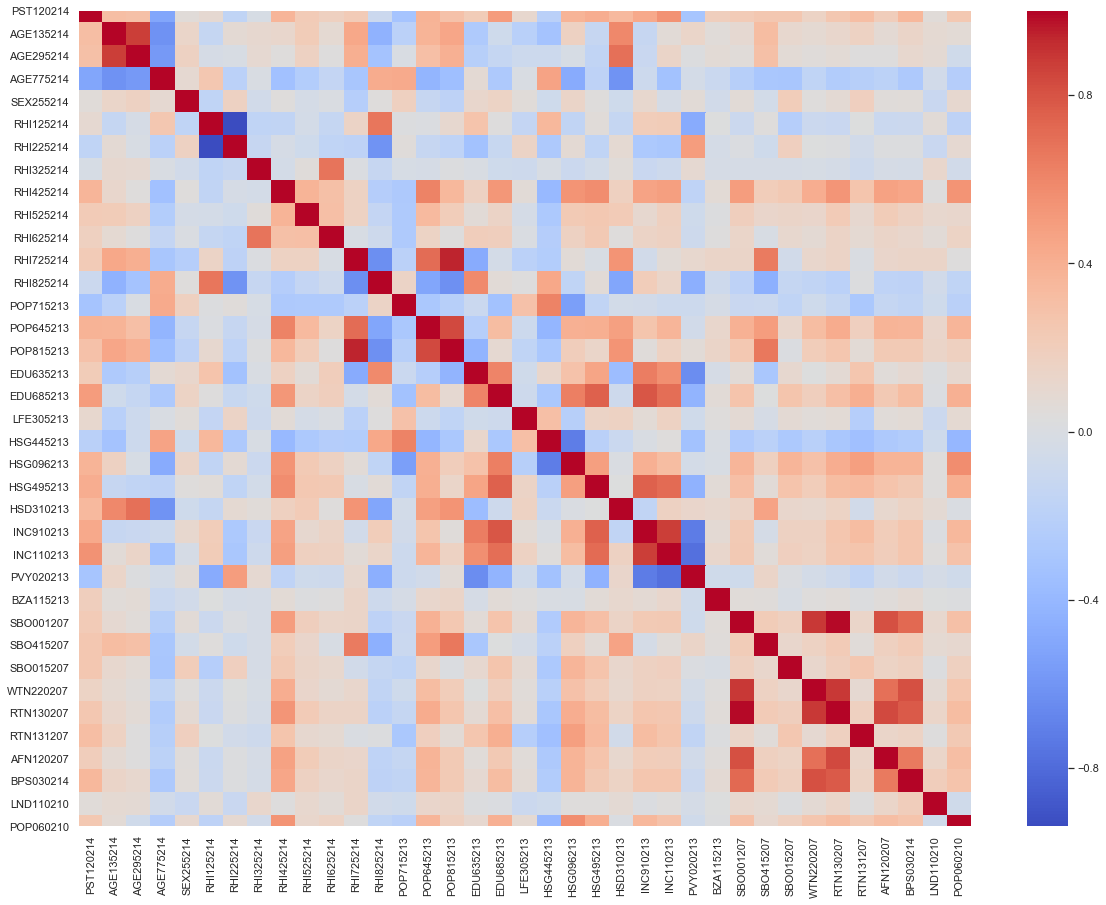

In [77]:
plt.figure(figsize=(20,15))

sns.heatmap(training_data[['PST120214', 'AGE135214',
       'AGE295214', 'AGE775214', 'SEX255214', 'RHI125214', 'RHI225214',
       'RHI325214', 'RHI425214', 'RHI525214', 'RHI625214', 'RHI725214',
       'RHI825214', 'POP715213', 'POP645213', 'POP815213', 'EDU635213',
       'EDU685213', 'LFE305213', 'HSG445213', 'HSG096213', 'HSG495213',
       'HSD310213', 'INC910213', 'INC110213', 'PVY020213', 'BZA115213',
       'SBO001207', 'SBO415207', 'SBO015207', 'WTN220207', 'RTN130207',
       'RTN131207', 'AFN120207', 'BPS030214', 'LND110210', 'POP060210']].corr(), cmap='coolwarm')

In [78]:
training_states = ['IA', 'NH', 'NV', 'SC', 'AL', 'AR', 'CA', 'CO', 'ME', 'MA', 'MN', 'NC', 'OK', 'TN', 'TX', 'UT', 'VT', 'VA']

training_data_BT = training_data[training_data['state'].isin(training_states)]

training_data_BT.drop(['state', 'votes', 'percent_votes'], axis=1, inplace=True)

X = training_data_BT.drop('winner',axis=1)
y = training_data_BT['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
predictions = rfc.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[256  54]
 [ 40 277]]


              precision    recall  f1-score   support

           0       0.86      0.83      0.84       310
           1       0.84      0.87      0.85       317

    accuracy                           0.85       627
   macro avg       0.85      0.85      0.85       627
weighted avg       0.85      0.85      0.85       627



In [80]:
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), X.columns), 
             reverse=True))


Features sorted by their score:
[(0.0547, 'RHI225214'), (0.053, 'LND110210'), (0.0355, 'HSG495213'), (0.0297, 'EDU635213'), (0.0253, 'HSG096213'), (0.0242, 'RHI125214'), (0.0223, 'EDU685213'), (0.0214, 'POP815213'), (0.0199, 'RHI725214'), (0.0198, 'POP645213'), (0.0197, 'HSG445213'), (0.0188, 'RHI825214'), (0.0179, 'POP060210'), (0.0178, 'SEX255214'), (0.0175, 'INC110213'), (0.0172, 'AGE295214'), (0.0165, 'vote_incarcerated'), (0.0165, 'RHI325214'), (0.0163, 'Net Worth'), (0.016, 'RHI425214'), (0.0158, 'HSD310213'), (0.0155, 'AFN120207'), (0.0151, 'INC910213'), (0.0149, 'LFE305213'), (0.0147, 'PVY020213'), (0.0145, 'eliminate_electoral_college'), (0.0144, 'legalize_cannabis'), (0.0142, 'POP715213'), (0.0141, 'ban_fracking'), (0.0139, 'RTN131207'), (0.0137, 'border_crossing_penalties'), (0.0135, 'job_guarantee'), (0.0134, 'AGE135214'), (0.0132, '% Donations Under $200'), (0.0131, 'rent_control'), (0.0131, 'raise_income_tax'), (0.013, 'Outside Money'), (0.0129, 'medicare_for_all'), (0.01

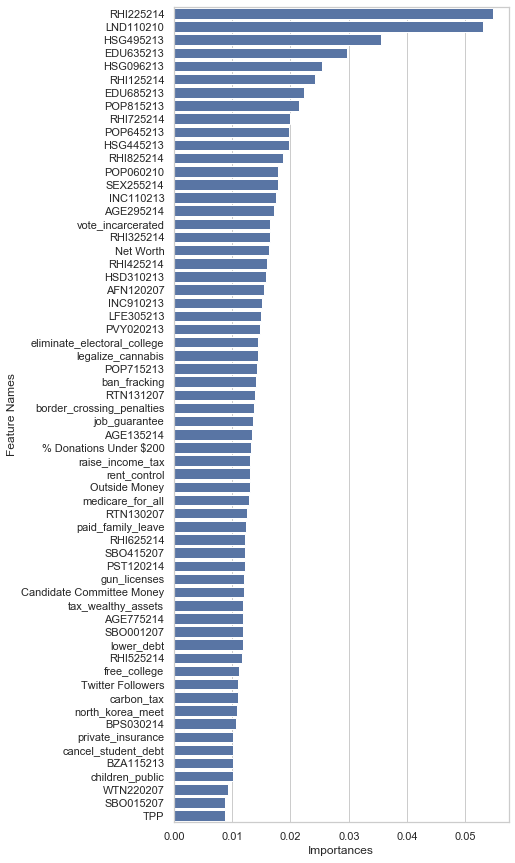

In [81]:
feature_importances = pd.DataFrame({"Feature Names": X.columns, "Importances": rfc.feature_importances_}).sort_values(by="Importances", ascending=False)

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="Importances", y="Feature Names", data=feature_importances,
            label="Total", color="b")

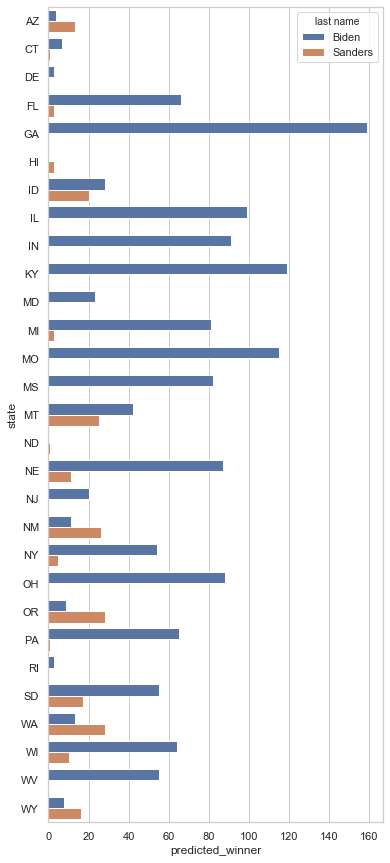

In [82]:
big_tuesday = data[~data['state'].isin(training_states)]

future_states = pd.read_csv('predictions.csv')

# filter out training states
future_states = future_states[~future_states['state_abbreviation'].isin(training_states)]

# filter out states already in the big_tuesday dataframe above
future_states = future_states[~future_states['state_abbreviation'].isin(big_tuesday['state'])]

# drop and rename columns
future_states.drop(['state'], axis=1, inplace=True)
future_states.rename(columns={'state_abbreviation': 'state', 'candidate': 'last name'}, inplace=True)

# add columns to match the big_tuesday dataframe
future_states['votes'], future_states['winner'], future_states['percent_votes'], future_states['winner_state'] = [0, -1, 0, -1]

predictions = big_tuesday.append(future_states, sort=False)

predictions_for_model = predictions.drop(['state', 'votes', 'percent_votes', 'winner', 'last name', 'winner_state', 'fips', 'county', 'Gender', 'SBO515207', 
                           'SBO115207', 
                           'SBO215207', 
                           'MAN450207',
                            'PST045214',
                          'PST040210',
                          'POP010210',
                          'BZA010213',
                          'BZA110213',
                          'HSD410213',
                          'NES010213',
                          'VET605213',
                          'HSG010214',
                          'SBO315207',
                          'ratify_NA_trade',
                          'Age',
                          'eliminate_filibuster'], axis=1)

predictions_BT = rfc.predict(predictions_for_model)

predictions['predicted_winner'] = predictions_BT

winner_plot = predictions.groupby(['last name', 'state'])['predicted_winner'].sum().reset_index()

f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="predicted_winner", y = 'state', data = winner_plot, hue = 'last name')

In [83]:
big_tuesday_state = add_state_winner(predictions)

training_states_df = data[data['state'].isin(training_states)]
training_states_df['used_in_model'] = 1
training_states_df['predicted_winner'] = -1
training_states_df['predicted_winner_state'] = -1

merged = big_tuesday_state.append(training_states_df, sort=False)

merged.to_csv('predictions/rfc_bigtuesday_pruned.csv', index=False)

merged

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,last name,votes,state,winner,percent_votes,winner_state,fips,county,PST045214,PST040210,...,children_public,ban_fracking,border_crossing_penalties,medicare_for_all,private_insurance,eliminate_electoral_college,eliminate_filibuster,predicted_winner,predicted_winner_state,used_in_model
264,Biden,241,ID,1,0.748447,1,16087,Washington County,10021,10198,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0
265,Biden,653,ID,1,0.620722,1,16085,Valley County,9826,9862,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0
266,Biden,1505,ID,1,0.558856,1,16083,Twin Falls County,80914,77230,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0
267,Biden,613,ID,0,0.471538,1,16081,Teton County,10341,10170,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0
268,Biden,577,ID,1,0.640400,1,16079,Shoshone County,12390,12765,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,Sanders,171,VA,0,0.182692,0,51007,Amelia County,12855,12695,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,-1,-1,1
3192,Sanders,234,VA,0,0.285366,0,51005,Alleghany County,15820,16261,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,-1,-1,1
3193,Sanders,7586,VA,0,0.267414,0,51510,Alexandria city,150575,140006,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,-1,-1,1
3194,Sanders,6315,VA,0,0.338533,0,51003,Albemarle County,104489,98998,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,-1,-1,1


# Tensorflow

## Big Tuesday

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=512, activation='relu', input_dim=79))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
big_tuesday_predict_scaled = X_scaler.transform(big_tuesday_predict)

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model.fit(
    X_train_scaled,
    y_train,
    epochs=60,
    shuffle=True,
    verbose=2
)

In [ ]:
 model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
big_tuesday = data[data['state'].isin(big_tuesday_states)]

big_tuesday_predict = big_tuesday.drop(['state', 'votes', 'percent_votes', 'winner', 'last name', 'winner_state', 'fips', 'county', 'Gender'], axis=1)

predictions_BT = model.predict_classes(big_tuesday_predict_scaled)

big_tuesday['predicted_winner'] = predictions_BT

winner_plot = big_tuesday.groupby(['last name', 'state'])['predicted_winner'].sum().reset_index()

f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="predicted_winner", y = 'state', data = winner_plot, hue = 'last name')